<a href="https://colab.research.google.com/github/Priyankaverma2024/Capstone-project-2_sentiment_analysis/blob/main/Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# mount my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/test_data_hidden.csv')
df.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  1000 non-null   object
 1   Product Brand        1000 non-null   object
 2   categories           1000 non-null   object
 3   primaryCategories    1000 non-null   object
 4   reviews.date         1000 non-null   object
 5   reviews.text         1000 non-null   object
 6   reviews.title        997 non-null    object
 7   sentiment            1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [ ]:
df1 = pd.read_csv('/content/test_data (1).csv')
df1.head()


,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  1000 non-null   object
 1   Product Brand        1000 non-null   object
 2   categories           1000 non-null   object
 3   primaryCategories    1000 non-null   object
 4   reviews.date         1000 non-null   object
 5   reviews.text         1000 non-null   object
 6   reviews.title        997 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [ ]:
df2 = pd.read_csv('/content/train_data.csv')
df2.head()


,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  4000 non-null   object
 1   Product Brand        4000 non-null   object
 2   categories           4000 non-null   object
 3   primaryCategories    4000 non-null   object
 4   reviews.date         4000 non-null   object
 5   reviews.text         4000 non-null   object
 6   reviews.title        3990 non-null   object
 7   sentiment            4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [ ]:
df2.isnull().sum()


,0
Name of the product,0
Product Brand,0
categories,0
primaryCategories,0
reviews.date,0
reviews.text,0
reviews.title,10
sentiment,0


# Sentiment Distribution Over the given dataset

In [ ]:
# Sentiment distribution
print("Sentiment Distribution:")
print(df2['sentiment'].value_counts())


Sentiment Distribution:
sentiment
Positive    3749
Neutral      158
Negative      93
Name: count, dtype: int64


In [ ]:
df2['sentiment'].value_counts()

,count
sentiment,
Positive,3749
Neutral,158
Negative,93


# Add review length feature

In [ ]:
df2['review_length'] = df2['reviews.text'].apply(lambda x: len(str(x).split()))

# Plot sentiment distribution

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

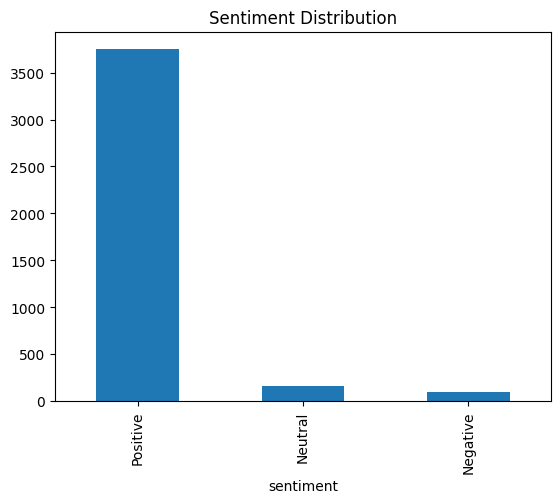

In [ ]:
df2['sentiment'].value_counts().plot(kind='bar',title='Sentiment Distribution')

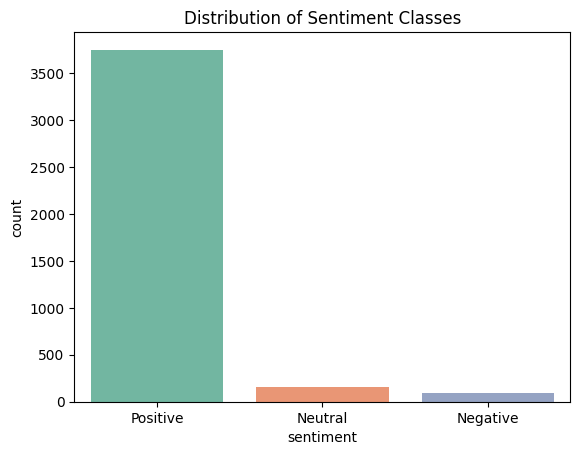

In [ ]:
#  Visualize Class Distribution
sns.countplot(data=df2, x='sentiment', palette='Set2')
plt.title("Distribution of Sentiment Classes")
plt.show()


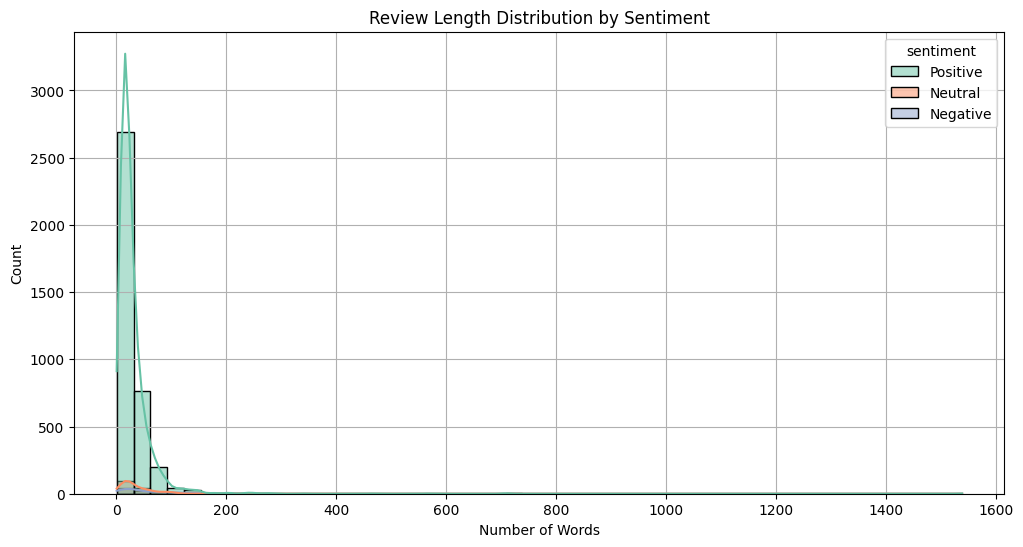

In [ ]:
# Plot review length distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df2, x='review_length', hue='sentiment', bins=50, kde=True, palette='Set2')
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
 # remove stopwords

stop_words = set(stopwords.words("english"))
print(stop_words)

{'wasn', 'doesn', "don't", 'but', 'through', 'on', 'me', 'her', 'ours', 'both', 'had', "you've", 'after', 'what', 'hasn', 'between', 'should', 'just', 'theirs', "doesn't", 'my', 'being', "it's", 'at', "wasn't", 'about', 'have', 'same', 'y', "should've", "they'll", "it'll", 'from', "i'm", 'doing', 'you', "we'll", "isn't", 'whom', 'd', 'each', 'couldn', "they've", 'yourself', "he'd", "i'd", 'm', "needn't", 'that', 'they', 'o', 'up', 'out', 'been', 'than', 'why', 'this', 'down', 'she', 'he', 'himself', 'ourselves', 'such', 'shan', 'their', "he's", 'not', 'above', 'once', 'against', 'under', "we'd", 'was', 'before', 'be', 'having', "weren't", 'we', 'i', 'how', 'the', 'only', 'here', "shouldn't", "we're", 'some', 'an', 'most', 'own', 'where', 'who', 'off', 'will', 'has', 'then', "didn't", 'were', 'weren', 'for', 'which', 't', "i'll", 'in', 'below', 'll', "won't", "you're", 'itself', "hadn't", 'won', 'if', 'no', 'very', "she'd", 'herself', 'haven', "it'd", 're', 'don', 'are', "aren't", 'few'

In [ ]:
import re
import string
from wordcloud import WordCloud

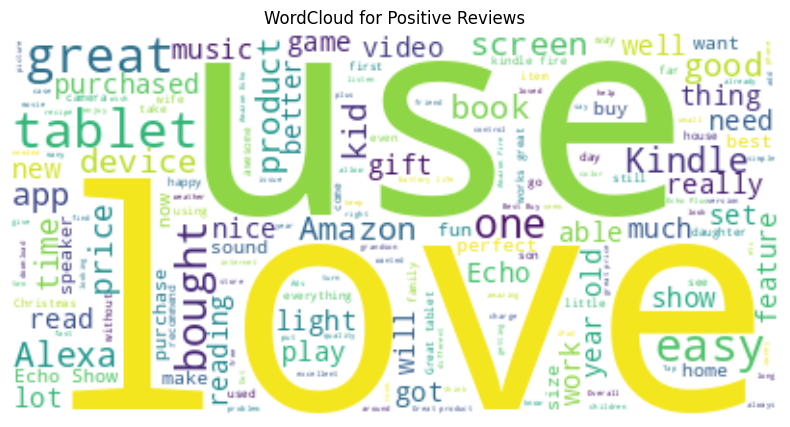

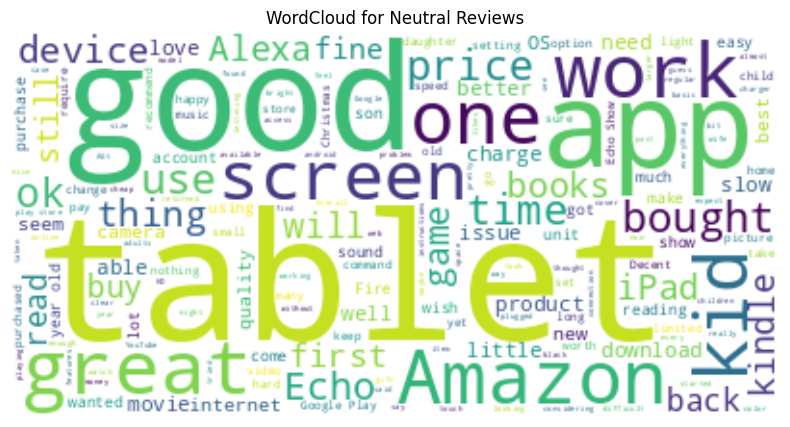

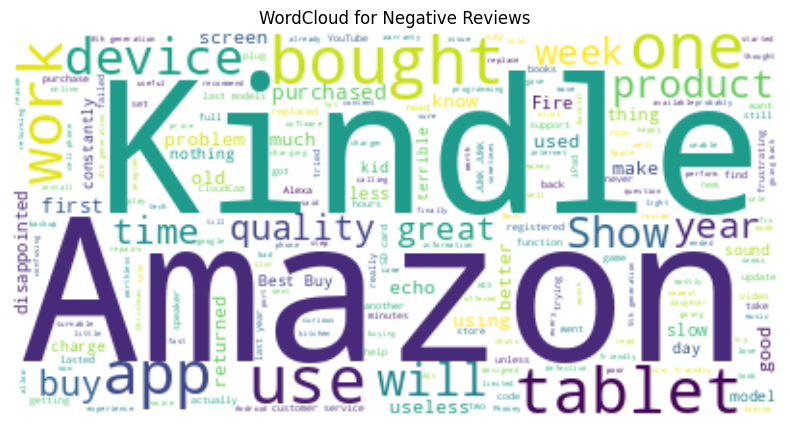

In [ ]:
# Wordclouds per sentiment
for sentiment in df2['sentiment'].unique():
    text = " ".join(df2[df2['sentiment'] == sentiment]['reviews.text'].dropna())
    wc = WordCloud(background_color='white', max_words=2000).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Reviews")
    plt.show()


In [ ]:
def preprocess(text):
    # tokenize
    words = word_tokenize(text.lower())
    # stopwords remove
    stopwords_removed = [word for word in words if word.isalpha() and word not in stop_words]
    return ''.join(stopwords_removed)


# Text Preprocessing

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>','',text)  # remove HTML tags
    text = re.sub(r'http\s+','',text)  # remove URLs
    text = re.sub(r'\d+','',text)  # remove numbers
    text = re.sub(rf"[{string.punctuation}]","",text)# remove punctuations
    text = re.sub(r'\s+','',text).strip() # remove extra white space
    return text

df2['clean_text'] = df2['reviews.text'].apply(clean_text)

In [ ]:
df2['clean_text']

,clean_text
0,purchasedonblackfridayprosgreatpriceevenoffsal...
1,ipurchasedtwoamazoninechoplusandtwodotsplusfou...
2,justanaveragealexaoptiondoesshowafewthingsonsc...
3,verygoodproductexactlywhatiwantedandaverygoodp...
4,thisistherdoneivepurchasediveboughtoneforallof...
...,...
3995,it‚äôsfunforthefamilytoplaywithbutitmaygetbori...
3996,ilovethekindleitisagreatproductitreduceseyestr...
3997,iwaslookingforablutoothspeakertousewithmyphone...
3998,thisisthesecondamazonfiretabletihavepurchasedt...


# Featuer Engineering


In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df2['clean_text'])

In [ ]:
# Target encoding
label_map = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
df2['sentiment_label'] = df2['sentiment'].map(label_map)
y = df2['sentiment_label']

In [ ]:
joblib.dump(label_map, 'label_map.pkl')

['label_map.pkl']

In [ ]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Train samples: 3200, Test samples: 800


In [ ]:
print("Before SMOTE:", y_train.value_counts())

Before SMOTE: sentiment_label
2    2999
1     127
0      74
Name: count, dtype: int64


In [ ]:
import joblib

In [ ]:
#  Apply SMOTE()

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", pd.Series(y_train_resampled).value_counts())

# --------------------- Save Preprocessed Data ---------------------
joblib.dump(X_train_resampled, "X_train_resampled.pkl")
joblib.dump(y_train_resampled, "y_train_resampled.pkl")
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_test, "y_test.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("✅ Preprocessing completed and saved for modeling.")

After SMOTE: sentiment_label
2    2999
1    2999
0    2999
Name: count, dtype: int64
✅ Preprocessing completed and saved for modeling.


# Check class imbalance

In [ ]:
print(df2['sentiment'].value_counts(normalize=True))


sentiment
Positive    0.93725
Neutral     0.03950
Negative    0.02325
Name: proportion, dtype: float64


In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
#from imblearn.over_sampling import SMOTE

In [ ]:
# oversampling using SMOTE

#from imblearn.over_sampling import SMOTE

#X = df2['reviews.text']
#y = df2['sentiment']

# TF-IDF vectorization
#vectorizer = TfidfVectorizer(max_features=5000)
#X_tfidf = vectorizer.fit_transform(X)
#X_tfidf.shape

# Apply SMOTE for handling class imbalance
#sm = SMOTE(random_state=42)
#X_resampled, y_resampled = sm.fit_resample(X_tfidf, y)


In [ ]:
# check class balance after resampling
#pd.Series(y_resampled).value_counts()

,count
sentiment,
Positive,3749
Neutral,3749
Negative,3749


# Train-Test Split

# Train a Baseline Classifier

Use Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.94      1.00      0.97       750

    accuracy                           0.94       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.88      0.94      0.91       800



<Axes: >

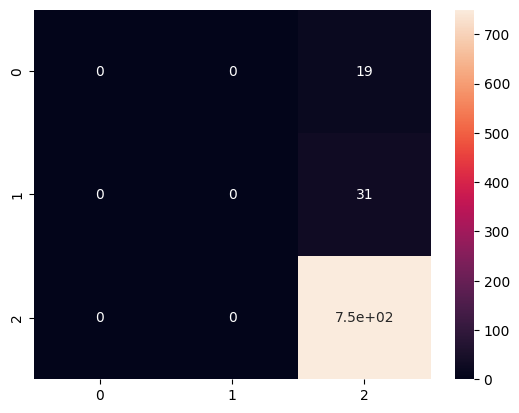

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
# model evaluation
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)


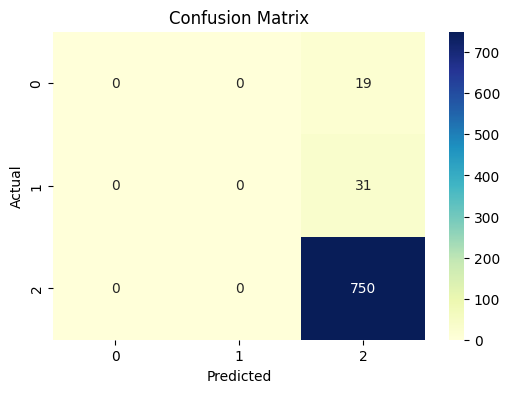

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Enhanced Evaluation Metrics

In [ ]:
from sklearn.metrics import roc_auc_score

# Binary ROC-AUC doesn’t directly apply to multiclass, use One-vs-Rest
y_prob = nb_model.predict_proba(X_test)
print("ROC-AUC Score (OvR, micro-average):", roc_auc_score(y_test, y_prob, multi_class='ovr', average='micro'))


ROC-AUC Score (OvR, micro-average): 0.9679312499999999


In [ ]:
joblib.dump(nb_model, "naive_bayes_model.pkl")

['naive_bayes_model.pkl']

# Multi-Class SVM and MLP Classifier

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.94      1.00      0.97       750

    accuracy                           0.94       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.88      0.94      0.91       800



<Axes: >

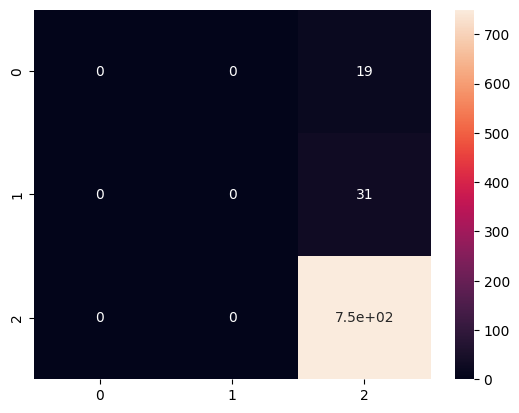

In [ ]:
from sklearn.svm import SVC
# Support Vector Classifier
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
# model evaluation
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True)


In [ ]:
# from sklearn.metrics import roc_auc_score

# Binary ROC-AUC doesn’t directly apply to multiclass, use One-vs-Rest
svm_prob = svm_model.predict_proba(X_test)
print("ROC-AUC Score (OvR, micro-average):", roc_auc_score(y_test, svm_prob, multi_class='ovr', average='micro'))


ROC-AUC Score (OvR, micro-average): 0.968803515625


In [ ]:
# save model
joblib.dump(svm_model,"svm_model.pkl")

['svm_model.pkl']

MLP Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.11      0.19        19
           1       1.00      0.19      0.32        31
           2       0.95      1.00      0.97       750

    accuracy                           0.95       800
   macro avg       0.98      0.43      0.50       800
weighted avg       0.95      0.95      0.93       800



<Axes: >

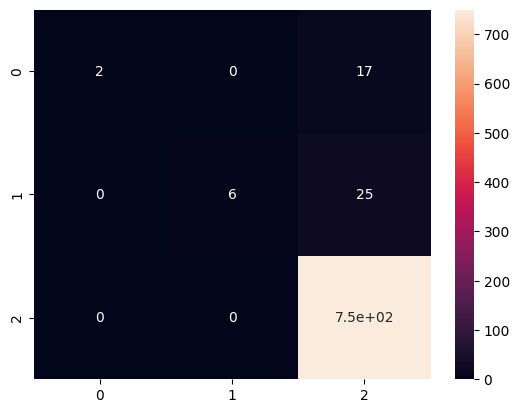

In [ ]:
#from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Support Vector Classifier
#svm_model = SVC(probability=True)
#svm_model.fit(X_train, y_train)
#svm_pred = svm_model.predict(X_test)
#print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

# MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
print("MLP Classification Report:\n", classification_report(y_test, mlp_pred))
sns.heatmap(confusion_matrix(y_test, mlp_pred), annot=True)


In [ ]:
# from sklearn.metrics import roc_auc_score

# Binary ROC-AUC doesn’t directly apply to multiclass, use One-vs-Rest
mlp_prob = mlp_model.predict_proba(X_test)
print("ROC-AUC Score (OvR, micro-average):", roc_auc_score(y_test, mlp_prob, multi_class='ovr', average='micro'))


ROC-AUC Score (OvR, micro-average): 0.9687945312499999


In [ ]:
joblib.dump(mlp_model,"mlp_model.pkl")

['mlp_model.pkl']

In [ ]:
# Ensemble with XGBoost
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder to your training labels and transform them
y_train_encoded = le.fit_transform(y_train)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model using the encoded labels
xgb_model.fit(X_train, y_train_encoded)

# Transform the test labels for prediction
y_test_encoded = le.transform(y_test)

# Make predictions on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model using the encoded labels
print("XGBoost Classification Report:\n", classification_report(y_test_encoded, xgb_pred))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.94      1.00      0.97       750

    accuracy                           0.94       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.88      0.94      0.91       800



In [ ]:
joblib.dump(xgb_model,"xgb_model.pkl")

['xgb_model.pkl']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Tokenize
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df2['reviews.text'])
X_seq = tokenizer.texts_to_sequences(df2['reviews.text'])
X_pad = pad_sequences(X_seq, maxlen=100)

# Encode labels
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

# Train-Test Split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, y_enc, test_size=0.2)

# LSTM Model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=64, validation_data=(X_test_lstm, y_test_lstm))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 193ms/step - accuracy: 0.8818 - loss: 0.6306 - val_accuracy: 0.9400 - val_loss: 0.2626
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - accuracy: 0.9283 - loss: 0.2973 - val_accuracy: 0.9400 - val_loss: 0.2549
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.9411 - loss: 0.2323 - val_accuracy: 0.9400 - val_loss: 0.2406
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.9354 - loss: 0.1918 - val_accuracy: 0.9362 - val_loss: 0.2545
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.9583 - loss: 0.1126 - val_accuracy: 0.9362 - val_loss: 0.2714


In [ ]:
joblib.dump(model,"lstm_model.pkl")

['lstm_model.pkl']

Topic Modeling (LDA & NMF)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

# Apply TF-IDF again for topic modeling
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_topics = tfidf.fit_transform(df2['reviews.text'])

# LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_topics)
print("LDA Topics:")
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:", [tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

# NMF
nmf = NMF(n_components=5, random_state=42)
nmf.fit(X_topics)
print("\nNMF Topics:")
for idx, topic in enumerate(nmf.components_):
    print(f"Topic {idx + 1}:", [tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


LDA Topics:
Topic 1: ['use', 'daughter', 'gift', 'great', 'year', 'old', 'kids', 'bought', 'tablet', 'loves']
Topic 2: ['recommend', 'battery', 'size', 'product', 'easy', 'use', 'tablet', 'price', 'good', 'great']
Topic 3: ['use', 'amazon', 'smart', 'sound', 'home', 'love', 'great', 'music', 'alexa', 'echo']
Topic 4: ['games', 'use', 'easy', 'great', 'reading', 'tablet', 'love', 'read', 'books', 'kindle']
Topic 5: ['new', 'great', 'best', 'bought', 'use', 'love', 'product', 'happy', 'buy', 'easy']

NMF Topics:
Topic 1: ['reading', 'like', 'games', 'amazon', 'kids', 'kindle', 'apps', 'price', 'good', 'tablet']
Topic 2: ['purchased', 'son', 'christmas', 'grandson', 'daughter', 'gift', 'year', 'old', 'bought', 'loves']
Topic 3: ['read', 'recommend', 'light', 'super', 'fun', 'setup', 'product', 'set', 'use', 'easy']
Topic 4: ['just', 'like', 'screen', 'plus', 'home', 'amazon', 'music', 'alexa', 'echo', 'love']
Topic 5: ['quality', 'gift', 'buy', 'sound', 'kids', 'recommend', 'price', 'work